# K-NN 알고리즘

In [1]:
%conda install -y pandas datasets tqdm
%pip install -U matplotlib

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /usr/local/envs/nplessthan2

  added / updated specs:
    - datasets
    - pandas
    - scikit-learn
    - tqdm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aiohappyeyeballs-2.4.0     |   py38h06a4308_0          19 KB
    aiohttp-3.10.5             |   py38h5eee18b_0         736 KB
    appdirs-1.4.4              |     pyhd3eb1b0_0          12 KB
    arrow-cpp-16.1.0           |       hc1eb8f0_0        12.1 MB
    async-timeout-4.0.3        |   py38h06a4308_0          12 KB
    attrs-24.2.0               |   py38h06a4308_0         149 KB
    aws-sdk-cpp-1.10.55        |       h721c034_0         2.5 MB
    boost-cpp-1.82.0           |       hdb19cb5_2          11 KB
    bottleneck-1.3.7           |   py38ha9d4c09_0         125 KB
    brotli-python-1.0.9       

In [2]:
%pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp38-cp38-linux_x86_64.whl size=3039354 sha256=4683faad6ae4e5820dcc888dd42430fca009e9fb6c879064c4bb120f729163aa
  Stored in directory: /root/.cache/pip/wheels/99/34/23/b19f7de7352af5d1913f2654641432d6740c2666eecf2472ea
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [3]:
# conda create -n nplessthan2 python=3.8 numpy=1.21
# conda remove -n nplessthan2 --all

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datasets import load_dataset
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection.split import train_test_split
import matplotlib.pyplot as plt

/usr/local/envs/nplessthan2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Data Load
data = load_dataset("nbtpj/movielens-1m-ratings")["train"].shuffle(seed=10).select(range(200000))
movielens_df = pd.DataFrame(data)
moveslens_df = movielens_df[["user_id", "movie_id", "user_rating"]]

In [13]:
# Decode
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(moveslens_df, reader)
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=10)

In [14]:
algo = KNNBasic()
algo.fit(train_data)

predictions = algo.test(test_data)
rmse = accuracy.rmse(predictions)

rmse

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9819


0.9819362490024204

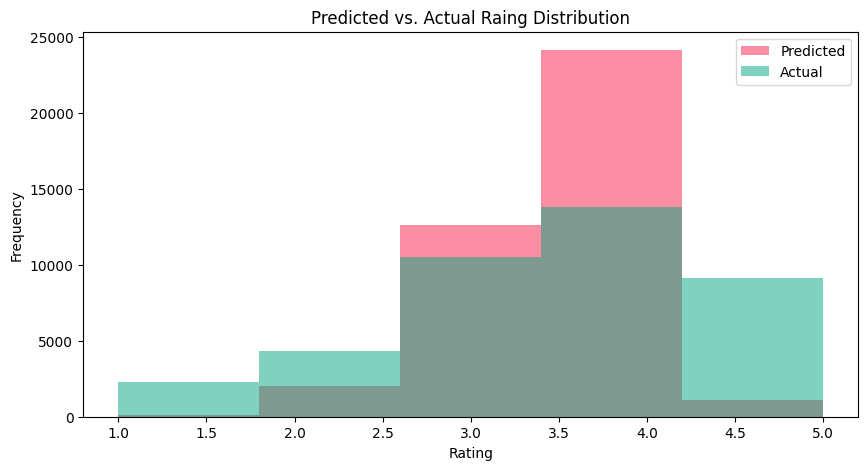

In [15]:
actual_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [round(pred.est) for pred in predictions]

plt.figure(figsize=(10, 5))
plt.hist(predicted_ratings, bins=5, alpha=0.5, label="Predicted", color="#fc1c49")
plt.hist(actual_ratings, bins=5, alpha=0.5, label="Actual", color="#00a67d")
plt.title("Predicted vs. Actual Raing Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()